In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
nltk.download('stopwords')

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk. stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.model_selection import train_test_split

import pickle

%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# with open("preprocessed_fake_real_data.pkl", 'rb') as picklefile: 
#     df = pickle.load(picklefile)

In [3]:
# df.head()

,title,content,publication,type,title_len,content_len
0,Muslims BUSTED: They Stole Millions In Gov’t B...,muslim busted stole million gov benefit print ...,100percentfedup,fake,53,505
1,Re: Why Did Attorney General Loretta Lynch Ple...,attorney general loretta lynch plead fifth att...,100percentfedup,fake,59,1789
2,BREAKING: Weiner Cooperating With FBI On Hilla...,breaking weiner cooperating fbi hillary email ...,100percentfedup,fake,68,1363
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,pin drop speech father daughter kidnapped kill...,100percentfedup,fake,125,271
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,fantastic trump point plan reform healthcare b...,100percentfedup,fake,99,2095


In [4]:
# ps = WordNetLemmatizer()

In [4]:
# # text preprocessing
# corpus = []
# for i in range(0, len(df)):
#     review = re.sub('[^a-zA-Z]', ' ', str(df['content'][i])) # removing sepcial characters and numbers
#     review = review.lower() # lowering the text
#     review = review.split() 
#     # removing stopwords and lemmatization
#     review = [ps.lemmatize(word) for word in review if not word in set(stopwords.words('english'))] 
#     review = ' '.join(review)
#     df['content'][i] = review
#     corpus.append(review)

# all_words = []
# for text in corpus:
#     all_words.append(text.split())
    
# words = [j for i in all_words for j in i]

# from nltk.probability import FreqDist
# fdist = FreqDist(words)

In [6]:
# df.head()

,title,content,publication,type
0,Muslims BUSTED: They Stole Millions In Gov’t B...,print pay back money plus interest entire fami...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,attorney general loretta lynch plead fifth bar...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,red state fox news sunday reported morning ant...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,email kayla mueller prisoner tortured isi chan...,100percentfedup,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,email healthcare reform make america great sin...,100percentfedup,fake


In [2]:
with open("preprocessed_fake_real_data.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [4]:
df.head()

,title,content,publication,type,title_len,content_len,title_upercase_len,title_punc_len,content_punc_len
0,Muslims BUSTED: They Stole Millions In Gov’t B...,muslim busted stole million gov benefit print ...,100percentfedup,fake,53,505,13,51,494
1,Re: Why Did Attorney General Loretta Lynch Ple...,attorney general loretta lynch plead fifth att...,100percentfedup,fake,59,1789,10,57,1736
2,BREAKING: Weiner Cooperating With FBI On Hilla...,breaking weiner cooperating fbi hillary email ...,100percentfedup,fake,68,1363,18,67,1323
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,pin drop speech father daughter kidnapped kill...,100percentfedup,fake,125,271,44,118,265
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,fantastic trump point plan reform healthcare b...,100percentfedup,fake,99,2095,32,94,2058


In [5]:
cv = TfidfVectorizer(max_features=10000) # shape (28665, 155161)
X = cv.fit_transform(df['content'].tolist()).toarray()

In [6]:
X.shape

(28665, 10000)

In [7]:
# Adding title length into tf-itf vectorize matrix
X = np.concatenate((X, df['title_len'].values.reshape(-1,1)), axis=1) 
X

array([[  0.,   0.,   0., ...,   0.,   0.,  53.],
       [  0.,   0.,   0., ...,   0.,   0.,  59.],
       [  0.,   0.,   0., ...,   0.,   0.,  68.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0., 105.],
       [  0.,   0.,   0., ...,   0.,   0.,  60.],
       [  0.,   0.,   0., ...,   0.,   0.,  79.]])

In [8]:
X.shape

(28665, 10001)

In [9]:
from sklearn.cluster import KMeans

num_clusters = 2
km6 = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=1) 
km6.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [10]:
km6.predict(X)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
len(km6.labels_)

28665

In [11]:
y=pd.get_dummies(df['type'])
y=y.iloc[:,0].values

### PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [13]:
# reduce the features to 2D

from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(X)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(km6.cluster_centers_)

In [14]:
pc_df = pd.DataFrame(data = reduced_features, columns = ['PC1', 'PC2'])
pc_df['Cluster'] = y
pc_df.head()

,PC1,PC2,Cluster
0,-4.584711,-1.308367,1
1,-5.912756,1.493759,1
2,-4.685545,-1.123317,1
3,-6.494089,-4.129431,1
4,0.869962,4.227649,1


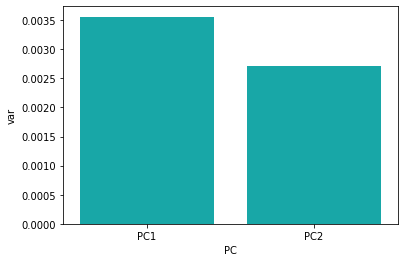

In [15]:
import seaborn as sns

df = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2']})
sns.barplot(x='PC',y="var", data=df, color="c");

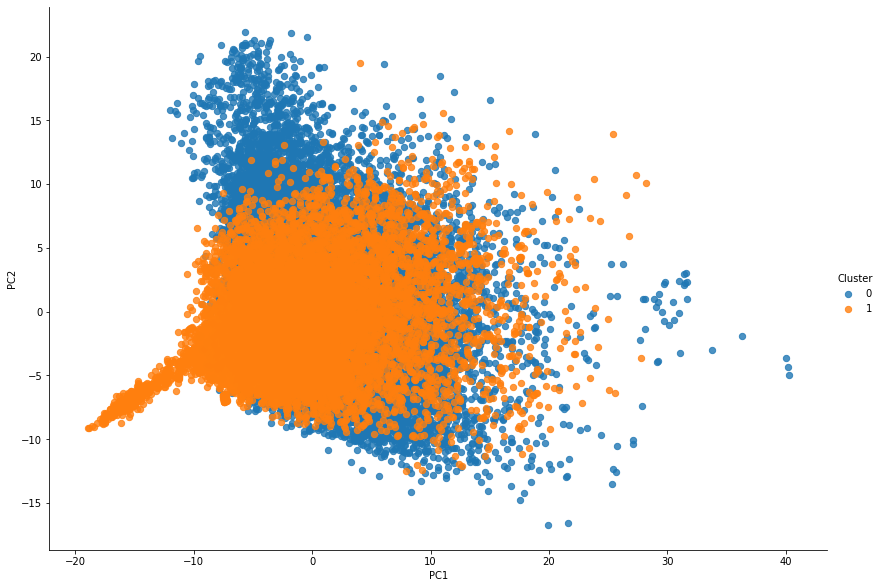

In [16]:
sns.lmplot( x="PC1", y="PC2", data=pc_df, fit_reg=False, hue='Cluster', legend=True,  scatter_kws={"s": 40},
          height=8.27, aspect=11.7/8.27)

In [17]:
########### With matplotlib ########

# plt.figure(figsize=(12,10))
# ## plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km6.predict(X), )
# ## plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
# for label in np.unique(y):
#     plt.scatter(reduced_features[y==label, 0], reduced_features[y==label, 1], label=label)

# plt.legend()
# plt.show()

# 1:Fake, 0:Real

In [18]:
Y = km6.labels_

z = pd.DataFrame(Y.tolist()) # a list

# digits_proj = TSNE(random_state=42).fit_transform(X)

### T-SNE

In [19]:
# fit the model using t-SNE algorithm
digits_proj = TSNE(n_components=2).fit_transform(X)

In [20]:
digits_proj.shape

(28665, 2)

In [21]:
tsne_df = pd.DataFrame(data = digits_proj, 
        columns = ['t-sne1', 't-sne2'])
tsne_df['Cluster'] = y
tsne_df.head()

,t-sne1,t-sne2,Cluster
0,-20.125175,5.826853,1
1,35.408798,22.243382,1
2,7.191297,18.079777,1
3,19.906790,-26.751827,1
4,13.641172,-28.583736,1


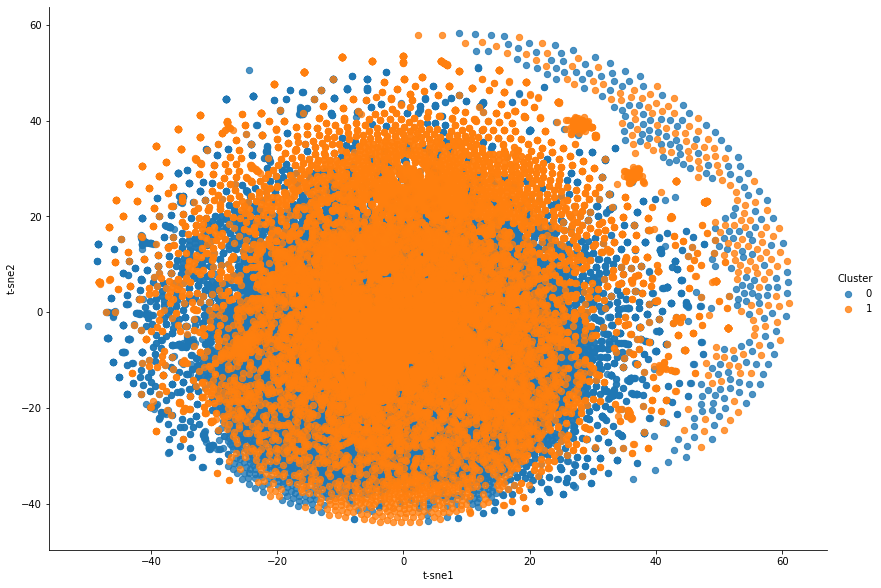

In [22]:
sns.lmplot( x="t-sne1", y="t-sne2", data=tsne_df, fit_reg=False, hue='Cluster', legend=True,  scatter_kws={"s": 40},
          height=8.27, aspect=11.7/8.27)